In [1]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')

In [2]:
file = np.load('/home/jsenadesouza/DA-healthy2patient/results/dataset/f20_t5_2ways_inbed_FSL.npz', allow_pickle=True)

In [3]:
x=file['X_test']
y=file['y_test']

In [4]:
def plot_acceleration(x, y, var):

    Tot = x.shape[0]
    Cols = x.shape[0]//2

    # Compute Rows required

    Rows = Tot // Cols
    Rows += Tot % Cols

    # Create a Position index

    Position = range(1,Tot + 1)
    # Create main figure

    fig = plt.figure(1, figsize=(20,10))
    k=0
    for sample, label, v in zip(x, y, var):

      # add every single subplot to the figure with a for loop

        ax = fig.add_subplot(Rows,Cols,Position[k])
        ax.plot(sample[0,:], label='x')
        ax.plot(sample[1,:], label='y')
        ax.plot(sample[2,:], label='z')
        ax.title.set_text(label + '\n' + str(v))
        ax.set_ylim(-0.5,0.5)
        ax.legend()
        k+=1
    #plt.axis('equal')
    plt.show()

/tmp/ipykernel_13697/2231144143.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v = np.array(v)


(18, 2)


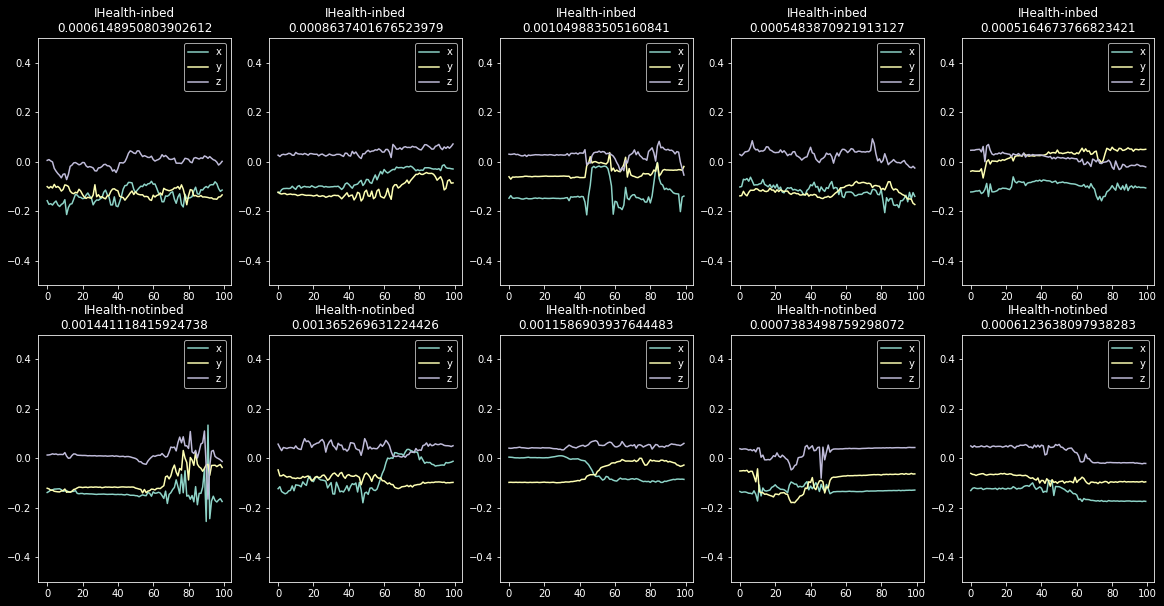

In [5]:
ids_1_shot = file['kfold_5_shot'][0]['train_idx']

samples_x = np.squeeze(x[ids_1_shot])
samples_y = y[ids_1_shot]

variance = []
for sample in samples_x:
    var = np.mean([np.var(sample[0, :]), np.var(sample[1,:]), np.var(sample[2,:])])
    variance.append(var)

v = []
for s, l in zip(file["X_test"], file["y_test"]):
    if l == 'IHealth-notinbed':
        v.append([s, l])
v = np.array(v)

# variance = []
# for sample in v[:,0]:
#     var = np.mean([np.var(sample[0, :]), np.var(sample[1,:]), np.var(sample[2,:])])
#     variance.append(var)

print(v.shape)
plot_acceleration(samples_x, samples_y, variance)

In [6]:
print(file["X_test"].shape)
print(np.unique(file["y_test"], return_counts=True))



(540, 3, 100)
(array(['IHealth-inbed', 'IHealth-notinbed'], dtype='<U16'), array([522,  18]))
